In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("./data/heart_disease_health_indicators_BRFSS2015.csv")

In [34]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [35]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [36]:
X["Age"].min()

1.0

In [46]:
X = X[["PhysActivity", "BMI", "Veggies", "Fruits", "Sex", "HvyAlcoholConsump"]]

In [47]:
gscv = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = [
    {
        "max_depth": [1],
        "max_leaf_nodes": [2]
    },
    {
        "max_depth": [2],
        "max_leaf_nodes": list(range(3, 5)),
    },
    {
        "max_depth": [3],
        "max_leaf_nodes": list(range(4, 9)),
    },
    {
        "max_depth": [4],
        "max_leaf_nodes": list(range(5, 17)),
    },
    {
        "max_depth": [5],
        "max_leaf_nodes": list(range(6, 18)),
    },
    ],
    scoring="roc_auc",
)

In [48]:
gscv.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1], 'max_leaf_nodes': [2]},
                         {'max_depth': [2], 'max_leaf_nodes': [3, 4]},
                         {'max_depth': [3], 'max_leaf_nodes': [4, 5, 6, 7, 8]},
                         {'max_depth': [4],
                          'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                             15, 16]},
                         {'max_depth': [5],
                          'max_leaf_nodes': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                             16, 17]}],
             scoring='roc_auc')

In [49]:
gscv.best_params_

{'max_depth': 5, 'max_leaf_nodes': 17}

In [50]:
y_pred = gscv.predict_proba(X)[:, 1]

In [51]:
roc_auc_score(y, y_pred)

0.6314216033815113

In [52]:
best_model = gscv.best_estimator_

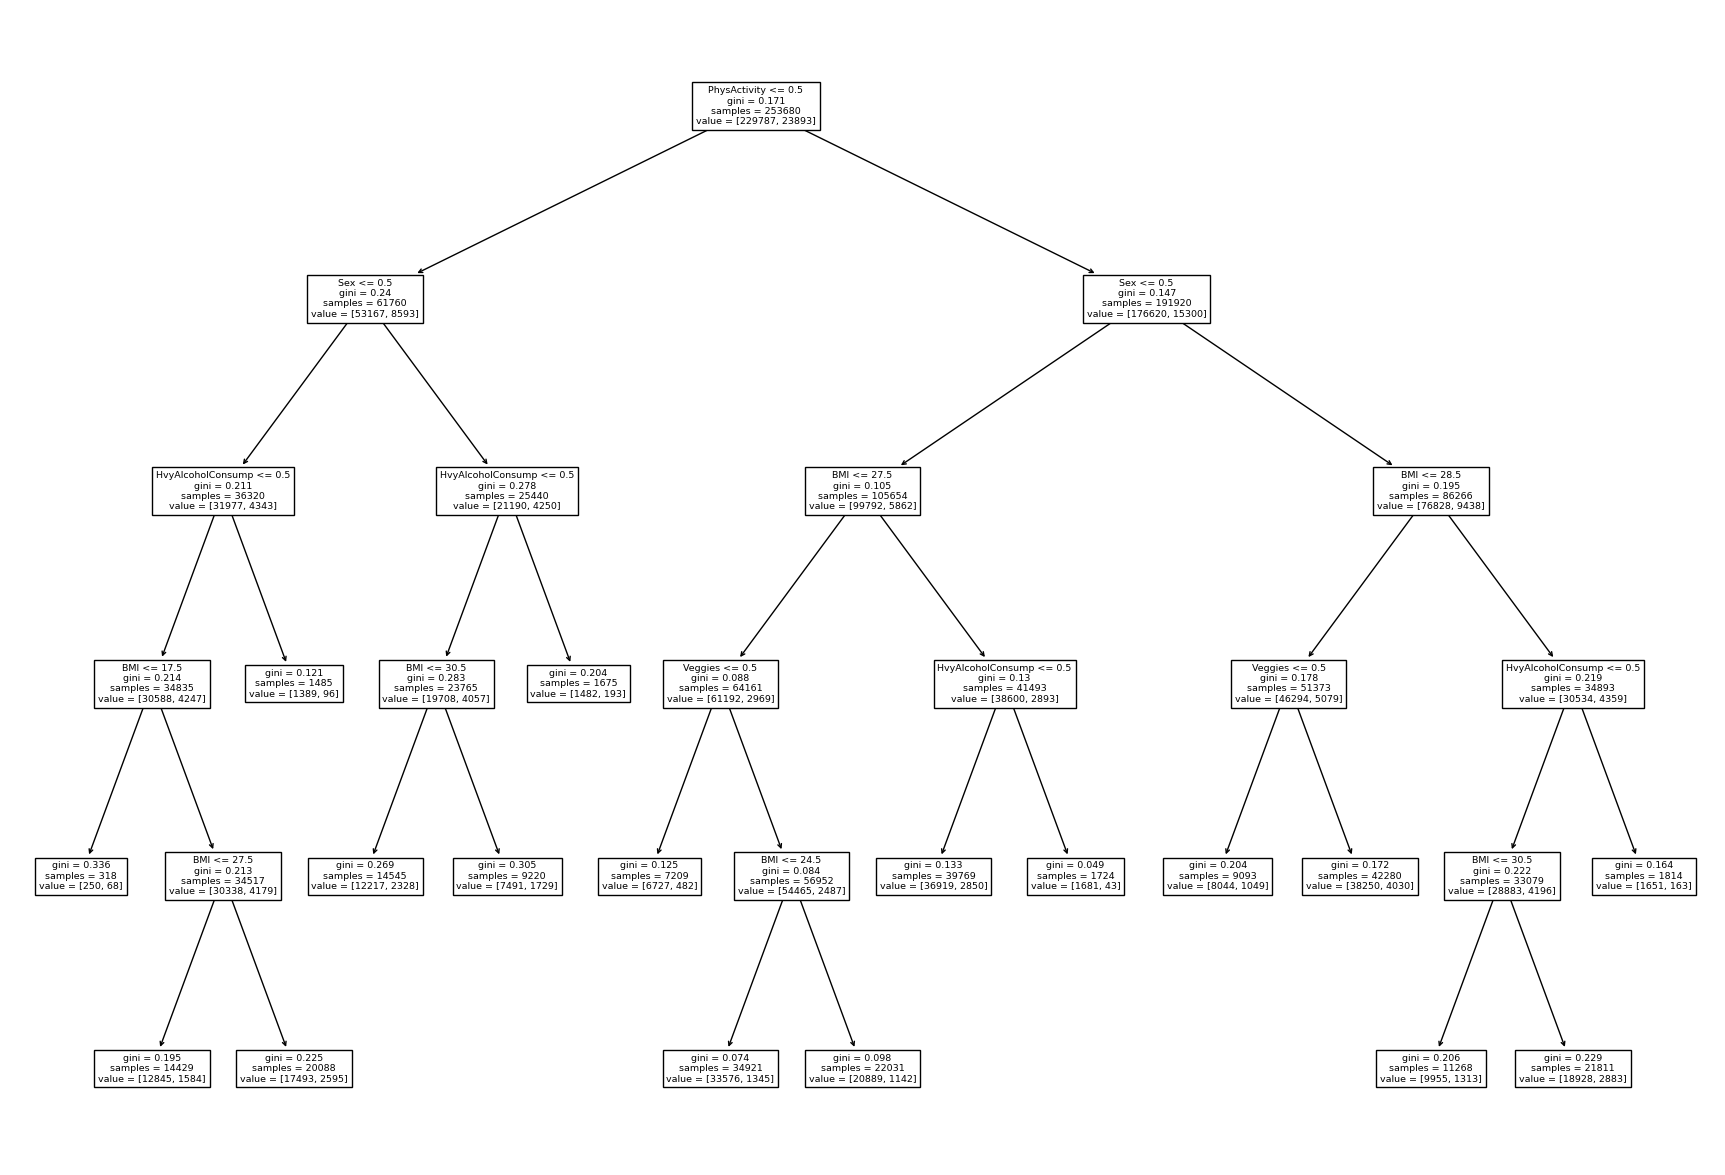

In [53]:
fig = plt.figure(figsize=(22, 15))

plot_tree(best_model, feature_names=list(X.columns))

plt.show()

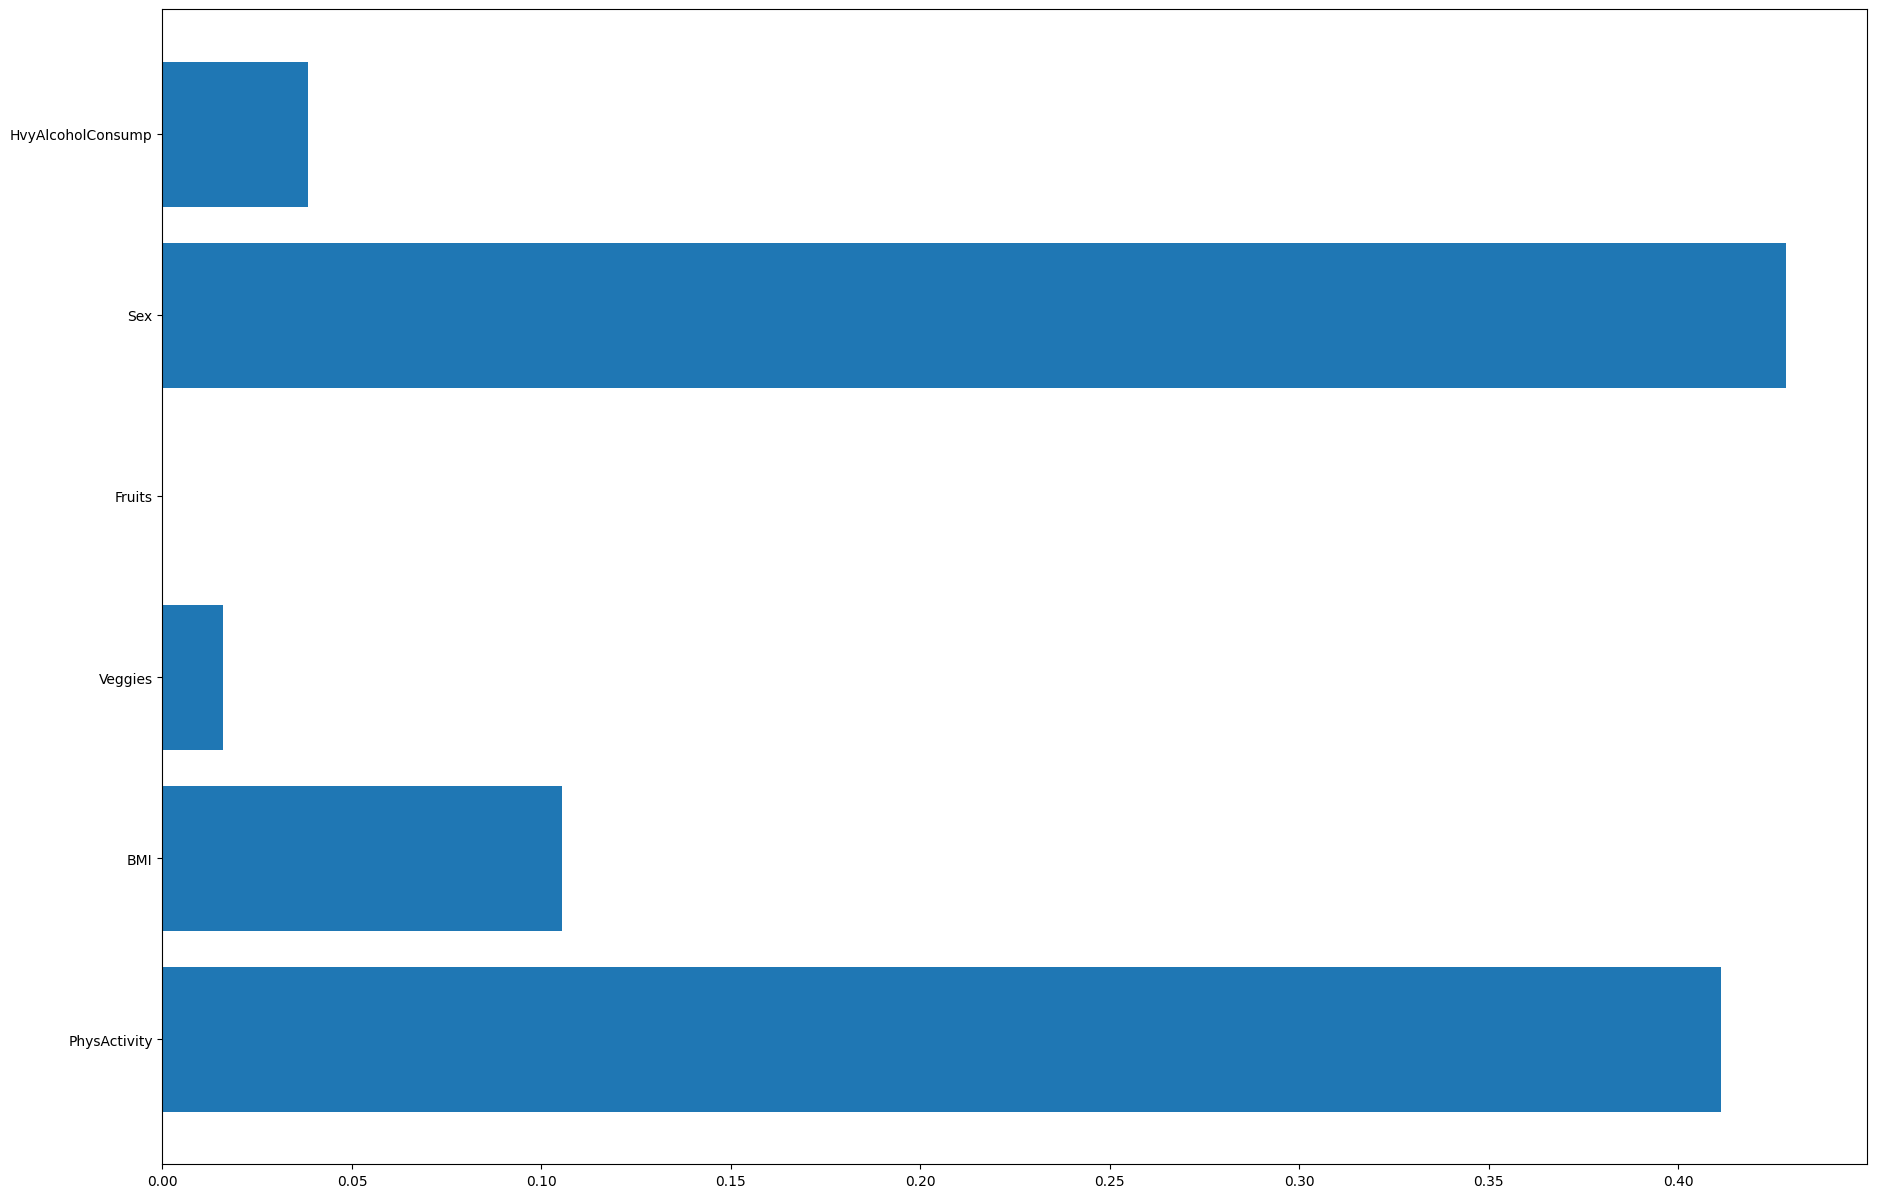

In [54]:
fig = plt.figure(figsize=(22, 15))

plt.barh(
    list(X.columns),
    best_model.feature_importances_,
)

plt.show()